In [460]:
# Data Processing
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [462]:
train_df = pd.read_csv("data//train_heart.csv")

x_types = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

x = train_df[x_types]
y = train_df[['HeartDisease']]

In [463]:
ce_ord = ce.OrdinalEncoder(cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
x = ce_ord.fit_transform(x)

In [464]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.25)

In [465]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [466]:
y_pred = rf.predict(x_test)

In [467]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8509316770186336


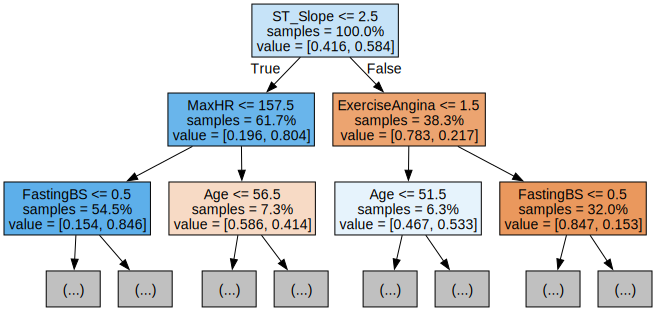

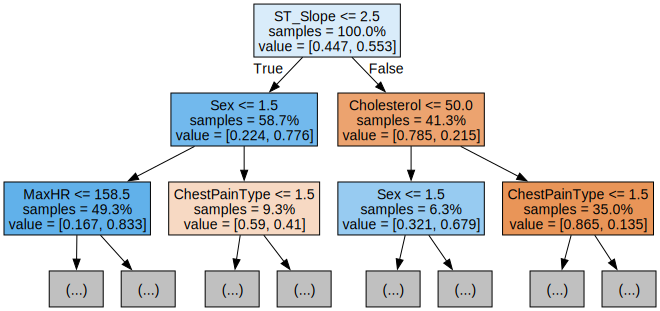

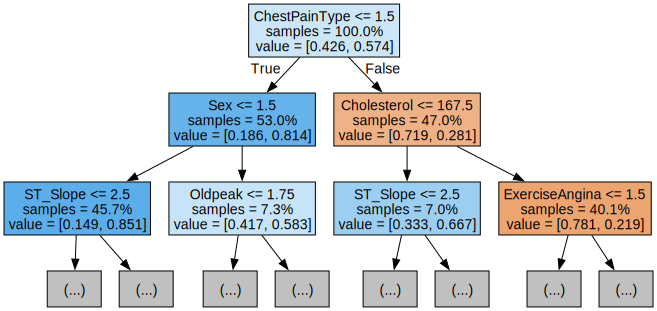

In [468]:
#decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [469]:
param_dist = {
    'n_estimators': randint(50, 1000),
    'max_depth': randint(1, 50),  # Adjusted range for max_depth
    # Add more hyperparameters if necessary
}

# random forest classifier
rf = RandomForestClassifier()

# random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x313c68e10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x313ba2d90>})

In [470]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 24, 'n_estimators': 630}


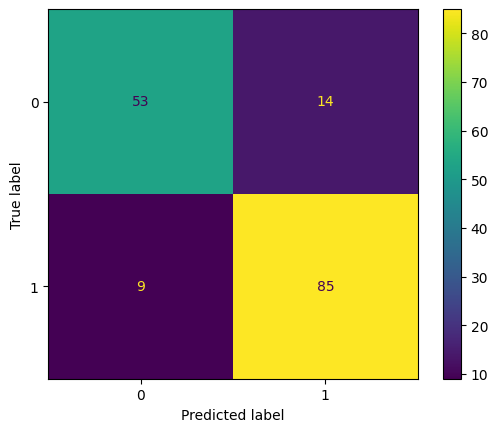

In [471]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [472]:
# Define and instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using your training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6832298136645962
Precision: 0.6972477064220184
Recall: 0.8085106382978723


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


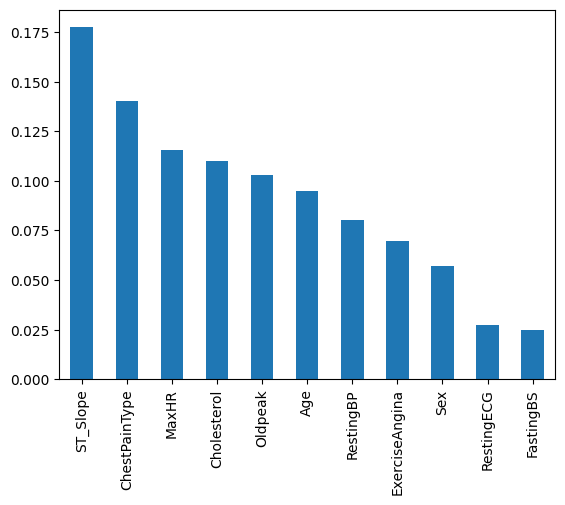

In [473]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [474]:
# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search CV
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
rand_search.fit(x_train, y_train)

# Get the best model
best_rf = rand_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

Accuracy: 0.8695652173913043
Best Hyperparameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 389}


In [475]:
# Finalize the Random Forest model with best hyperparameters
best_rf_params = {
    'max_depth': 14,
    'max_features': 'sqrt',
    'min_samples_leaf': 9,
    'min_samples_split': 3,
    'n_estimators': 389
}
final_rf_model = RandomForestClassifier(**best_rf_params)

# Train the finalized model on the entire training dataset
final_rf_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = final_rf_model.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Final Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Final Model Performance:
Accuracy: 0.8633540372670807
Precision: 0.8673469387755102
Recall: 0.9042553191489362
